# Data
The data was collected by providing a survey to developers on stack overflow’s website.

Data is available [here](https://www.kaggle.com/datasets/stackoverflow/so-survey-2017)





# Understand the data


First, we need to undertand the data.  Let's read in the data and necessary libraries.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

### **Question 1**
1. Provide the number of rows and columns in this dataset.

In [2]:
num_rows =df.shape[0]
num_cols =df.shape[1]
print('the number of rows in the dataset',num_rows)
print("the number of columns in the dataset",num_cols)

the number of rows in the dataset 51392
the number of columns in the dataset 154


### Question 2
2. Which columns had no missing values? Provide a set of column names that have no missing values.

In [6]:
no_nulls = df.isnull().sum()
no_nulls[no_nulls == 0]

Respondent          0
Professional        0
ProgramHobby        0
Country             0
University          0
EmploymentStatus    0
FormalEducation     0
dtype: int64

### Question 3
3. Which columns have the most missing values? Provide a set of column names that have more than 70% if their values missing.

In [9]:
most_missing_cols = df.isnull().mean()*100
m = most_missing_cols[most_missing_cols>70].sort_values()
# m

Overpaid               73.951199
Salary                 74.916329
WebDeveloperType       79.187422
NonDeveloperType       90.484900
TimeAfterBootcamp      94.936955
ExpectedSalary         95.007005
MobileDeveloperType    96.978129
YearsCodedJobPast      98.104763
ExCoderSkills          98.180651
ExCoderActive          98.190380
ExCoderBelonged        98.194271
ExCoderReturn          98.204001
ExCoderBalance         98.204001
ExCoderWillNotCode     98.205946
ExCoderNotForMe        98.207892
ExCoder10Years         98.215676
dtype: float64

In [11]:
df.drop(columns=m.index,axis=1,inplace=True)

In [12]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 4
4. Count the number of each unique Professional status in the dataset.

In [13]:
df['Professional'].value_counts()

Professional
Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: count, dtype: int64

### Question 5
5. Count the number of each unique **FormalEducation** status in the dataset.

In [15]:
df['FormalEducation'].value_counts()

FormalEducation
Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: count, dtype: int64

In [82]:
df['FormalEducation'].unique()

array(['Secondary school',
       "Some college/university study without earning a bachelor's degree",
       "Bachelor's degree", 'Doctoral degree', "Master's degree",
       'Professional degree', 'Primary/elementary school',
       'I prefer not to answer', 'I never completed any formal education'],
      dtype=object)

Fill nulls

In [16]:
d = df.isnull().sum()
d[d > 0]

MajorUndergrad           8551
HomeRemote               7384
CompanySize             12470
CompanyType             12569
YearsProgram              247
                        ...  
Race                    18359
SurveyLong              16672
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Length: 131, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 138 entries, Respondent to InterestedAnswers
dtypes: float64(4), int64(1), object(133)
memory usage: 54.1+ MB


In [18]:
numeric = df.select_dtypes(include=np.number).columns
categorical = df.select_dtypes(include="object").columns
print(numeric)
print(categorical)

Index(['Respondent', 'CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek',
       'StackOverflowSatisfaction'],
      dtype='object')
Index(['Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize', 'CompanyType',
       ...
       'StackOverflowBetter', 'StackOverflowWhatDo', 'StackOverflowMakeMoney',
       'Gender', 'HighestEducationParents', 'Race', 'SurveyLong',
       'QuestionsInteresting', 'QuestionsConfusing', 'InterestedAnswers'],
      dtype='object', length=133)


In [19]:
for col in numeric:
    df[col].fillna(df[col].mean(),inplace=True)

for col in categorical:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12376\2243551368.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12376\2243551368.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [20]:
# df.isna().sum()
df.isna().sum().sum()

0

In [21]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,Computer science or software engineering,A few days each month,20 to 99 employees,...,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,Strongly agree,Agree,Disagree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree


In [22]:
df.duplicated().sum()

0

### Question 6
6. Plot the 10 highset surveyed Countries in the dataset.

In [23]:
df['JobSatisfaction']

0         6.957078
1         6.957078
2         9.000000
3         3.000000
4         8.000000
           ...    
51387     3.000000
51388     6.957078
51389    10.000000
51390     7.000000
51391     8.000000
Name: JobSatisfaction, Length: 51392, dtype: float64

In [24]:
df['JobSatisfaction'].min()

0.0

C:\Users\user\AppData\Local\Temp\ipykernel_12376\4085960492.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['JobSatisfaction'])


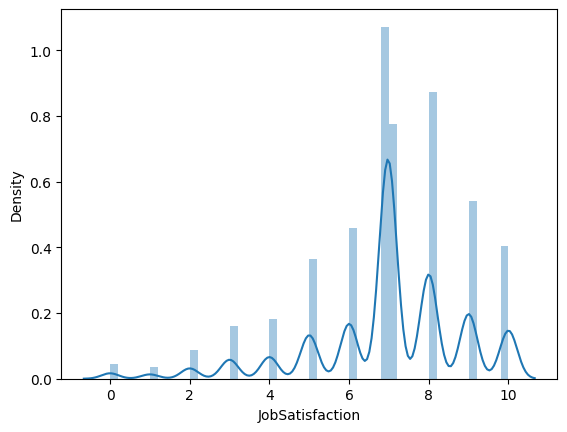

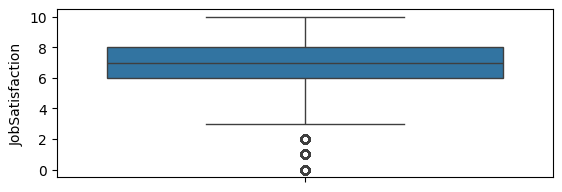

In [26]:
# sns.histplot(df['JobSatisfaction'])
sns.distplot(df['JobSatisfaction'])
plt.show()
plt.subplot(2,1,1)
sns.boxplot(df['JobSatisfaction'])
plt.subplot(2,1,1)
plt.show()
# plt.title("JobSatisfaction")

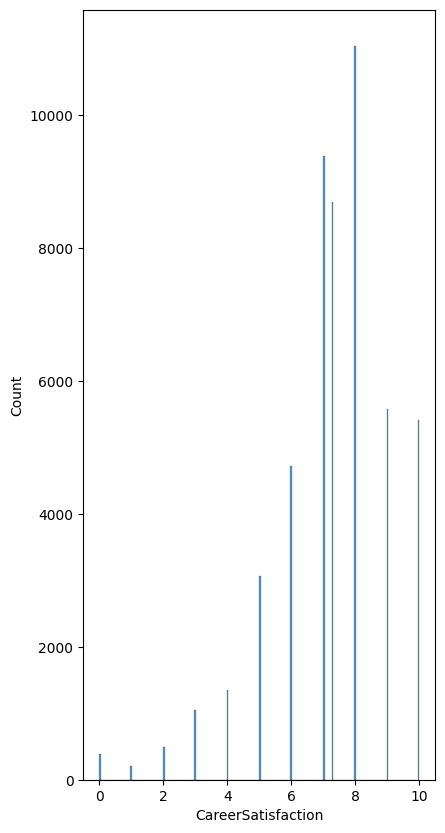

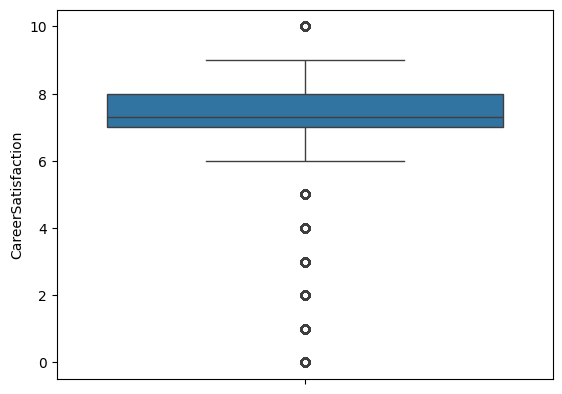

<Axes: >

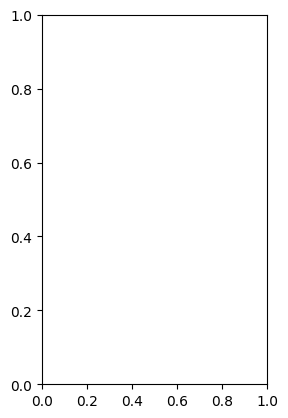

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.histplot(df[numeric[1]])
plt.show()

sns.boxplot(df[numeric[1]])
plt.show()
plt.subplot(1,2,2)

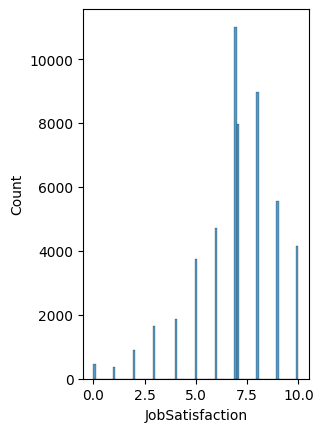

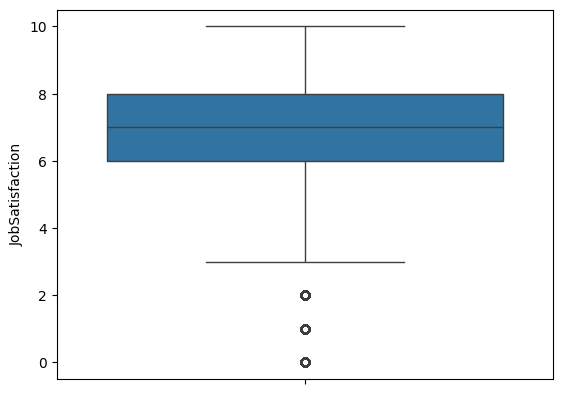

<Axes: >

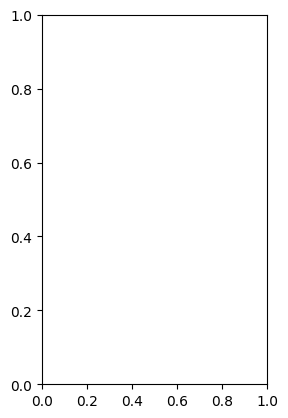

In [28]:
# plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.histplot(df[numeric[2]])
plt.show()

sns.boxplot(df[numeric[2]])
plt.show()
plt.subplot(1,2,2)

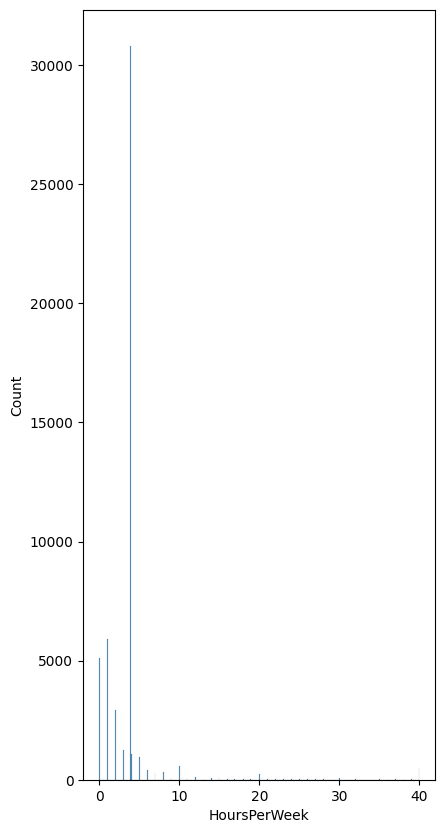

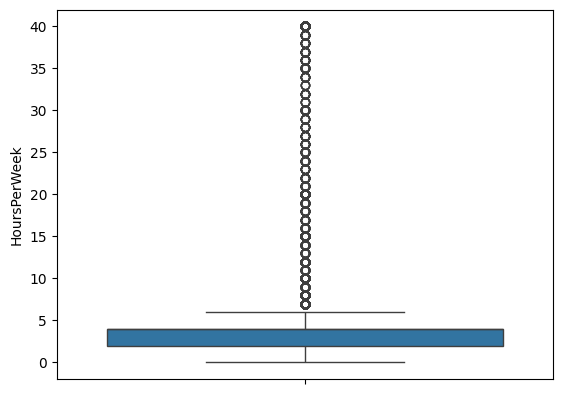

<Axes: >

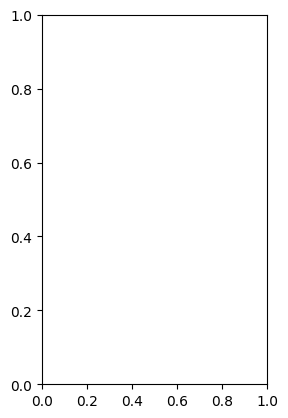

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.histplot(df[numeric[3]])
plt.show()

sns.boxplot(df[numeric[3]])
plt.show()
plt.subplot(1,2,2)

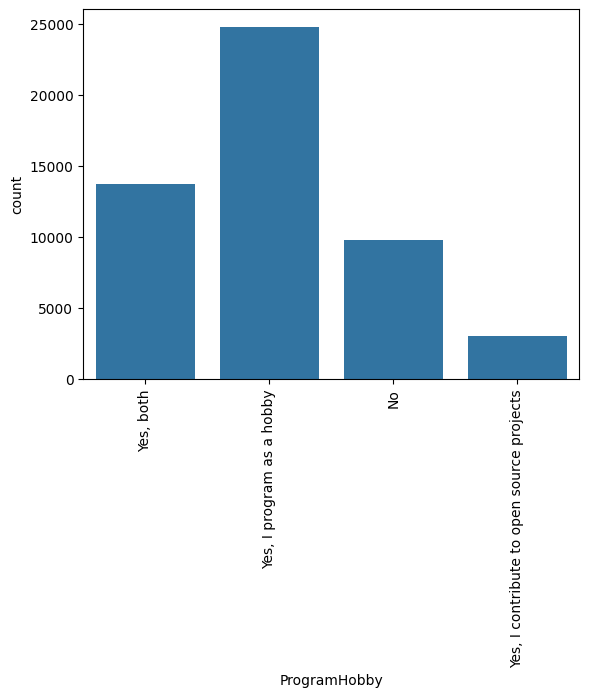

In [133]:
sns.countplot(data=df,x=categorical[1])
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x2d9f5cc79e0>,
 [Text(0.06015247310532711, 1.0983540776904837, 'Yes, I program as a hobby'),
  Text(-0.8186041719409225, -0.7347701747355542, 'Yes, both'),
  Text(0.6209874627135555, -0.9079507537045061, 'No'),
  Text(1.080960983164786, -0.20377279719191999, 'Yes, I contribute to open source projects')],
 [Text(0.032810439875632966, 0.5991022241948092, '48.3%'),
  Text(-0.4465113665132304, -0.4007837316739386, '26.8%'),
  Text(0.3387204342073939, -0.49524586565700324, '19.0%'),
  Text(0.5896150817262469, -0.11114879846831997, '5.9%')])

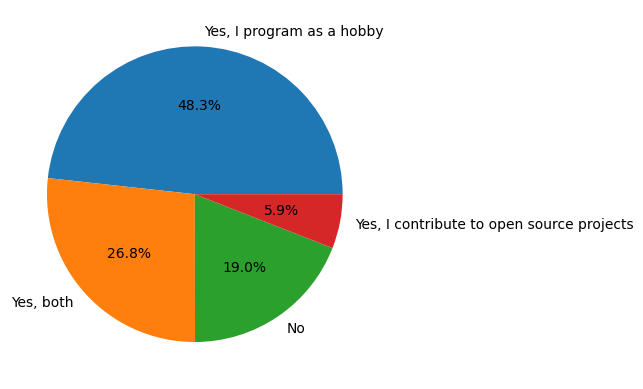

In [137]:
plt.pie(df[categorical[1]].value_counts(),labels=df[categorical[1]].value_counts().index,autopct='%1.1f%%')

In [148]:
df[df.columns[25:50]]

,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,...,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,TabsSpaces,EducationTypes
0,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",...,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,Tabs,Online course; Open source contributions
1,Somewhat agree,Somewhat agree,Agree,Agree,Disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",...,Important,Important,Somewhat important,Somewhat important,Not very important,Somewhat important,Not very important,Very important,Spaces,Online course; Self-taught; Hackathon; Open so...
2,Disagree,Disagree,Agree,Somewhat agree,Disagree,Somewhat agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",...,Important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Not very important,Important,Spaces,Self-taught; Coding competition; Hackathon; Op...
3,Somewhat agree,Strongly disagree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Somewhat agree,Agree,I am actively looking for a job,...,Very important,Very important,Somewhat important,Somewhat important,Not very important,Not very important,Important,Very important,Spaces,Self-taught
4,Somewhat agree,Somewhat agree,Agree,Agree,Disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",...,Important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Not very important,Important,Tabs,Self-taught
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,Disagree,Agree,Agree,Strongly agree,Somewhat agree,Somewhat agree,Agree,Disagree,Somewhat agree,I am actively looking for a job,...,Important,Not very important,Not very important,Not very important,Not very important,Not very important,Not very important,Important,Both,Online course; Self-taught; Coding competition
51388,Somewhat agree,Somewhat agree,Agree,Agree,Disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",...,Somewhat important,Somewhat important,Important,Not very important,Somewhat important,Somewhat important,Somewhat important,Very important,Tabs,Online course
51389,Somewhat agree,Somewhat agree,Agree,Agree,Disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",...,Important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Not very important,Important,Tabs,Self-taught; Coding competition
51390,Agree,Strongly disagree,Strongly agree,Strongly agree,Disagree,Somewhat agree,Strongly agree,Disagree,Strongly disagree,"I'm not actively looking, but I am open to new...",...,Important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Not very important,Important,Spaces,Self-taught


([<matplotlib.patches.Wedge at 0x2d999097290>,
 [Text(-0.23533291704279113, 1.0745317204048146, 'Tabs'),
  Text(-0.2646681356394913, -1.0676847746301883, 'Spaces'),
  Text(0.9863418712735778, -0.4869596625723093, 'Both')],
 [Text(-0.12836340929606788, 0.5861082111298989, '56.9%'),
  Text(-0.1443644376215407, -0.5823735134346482, '28.5%'),
  Text(0.538004657058315, -0.26561436140307776, '14.6%')])

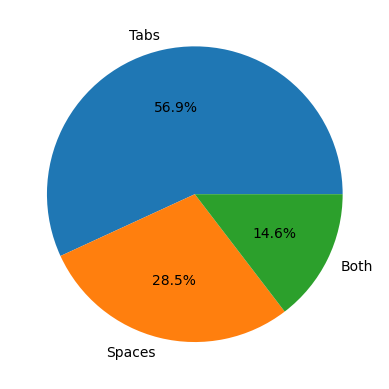

In [160]:

plt.pie(df['TabsSpaces'].value_counts(),labels=df['TabsSpaces'].value_counts().index,autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x2d990fc2600>,
 [Text(-0.18205938284227655, 1.0848291944444939, 'Somewhat agree'),
  Text(-0.747391496940854, -0.8070972372028723, 'Disagree'),
  Text(0.1961026842077334, -1.0823787402044267, 'Agree'),
  Text(0.8460298801148055, -0.7030173838198653, 'Strongly agree'),
  Text(1.0746610813298114, -0.234741475404413, 'Strongly disagree')],
 [Text(-0.09930511791396901, 0.5917250151515421, '55.3%'),
  Text(-0.40766808924046577, -0.4402348566561121, '15.6%'),
  Text(0.10696510047694549, -0.590388403747869, '13.8%'),
  Text(0.4614708436989848, -0.3834640275381083, '8.4%'),
  Text(0.5861787716344425, -0.12804080476604343, '6.8%')])

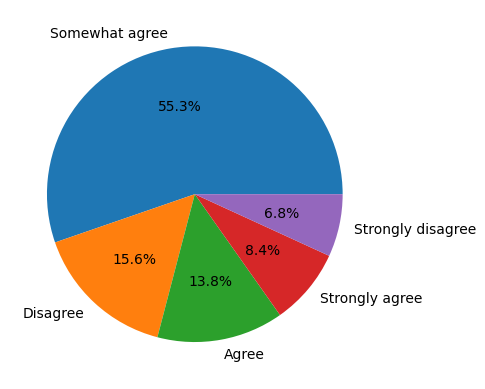

In [150]:
plt.pie(df['UnderstandComputers'].value_counts(),labels=df['UnderstandComputers'].value_counts().index,autopct='%1.1f%%')

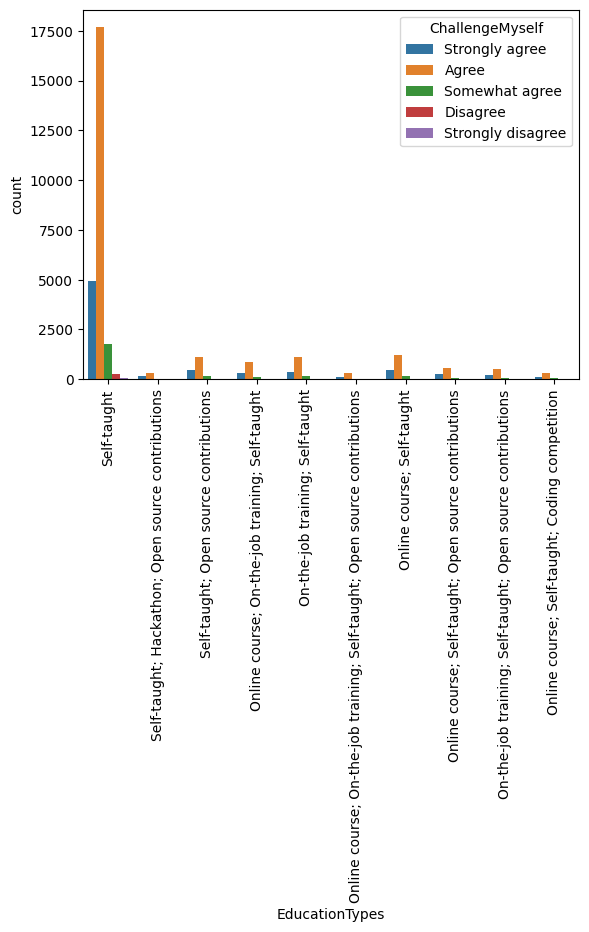

In [ ]:
top_10_categories = df['EducationTypes'].value_counts().head(10).index
filtered_df = df[df['EducationTypes'].isin(top_10_categories)]

sns.countplot(data=filtered_df, x='EducationTypes', hue='ChallengeMyself')
plt.xticks(rotation=90)
plt.show()


([<matplotlib.patches.Wedge at 0x2d9990ff350>,
 [Text(-0.26323221579412903, 1.0680396999026363, 'Agree'),
  Text(-0.5595610973435444, -0.9470434933727641, 'Somewhat agree'),
  Text(0.4908150095968035, -0.9844290865036902, 'Strongly agree'),
  Text(1.015648840272536, -0.4224422247515661, 'Disagree'),
  Text(1.0979412542533962, -0.06726813665086595, 'Strongly disagree')],
 [Text(-0.14358120861497947, 0.5825671090378015, '57.7%'),
  Text(-0.30521514400556965, -0.5165691782033258, '17.6%'),
  Text(0.2677172779618928, -0.5369613199111036, '14.1%'),
  Text(0.5539902765122923, -0.2304230316826724, '8.7%'),
  Text(0.5988770477745796, -0.03669171090047233, '1.9%')])

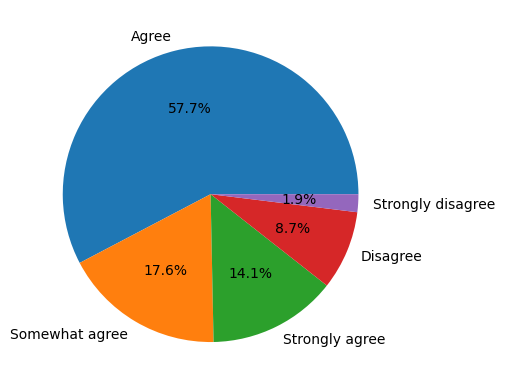

In [161]:

plt.pie(df['ChangeWorld'].value_counts(),labels=df['ChangeWorld'].value_counts().index,autopct='%1.1f%%')



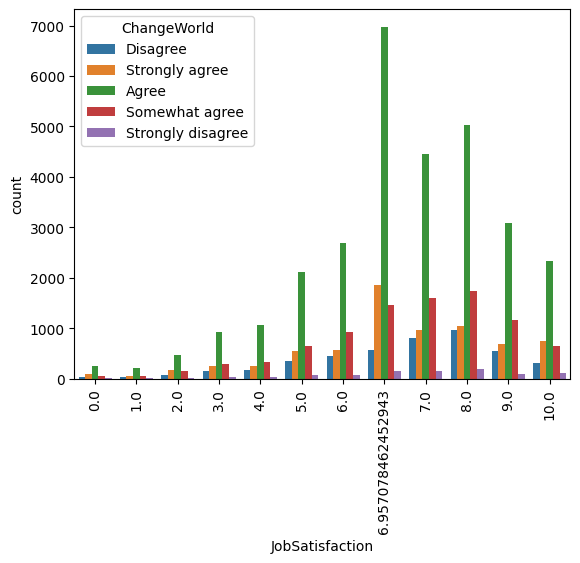

In [ ]:
sns.countplot(data=df, x='JobSatisfaction', hue='ChangeWorld')
plt.xticks(rotation=90)
plt.show()

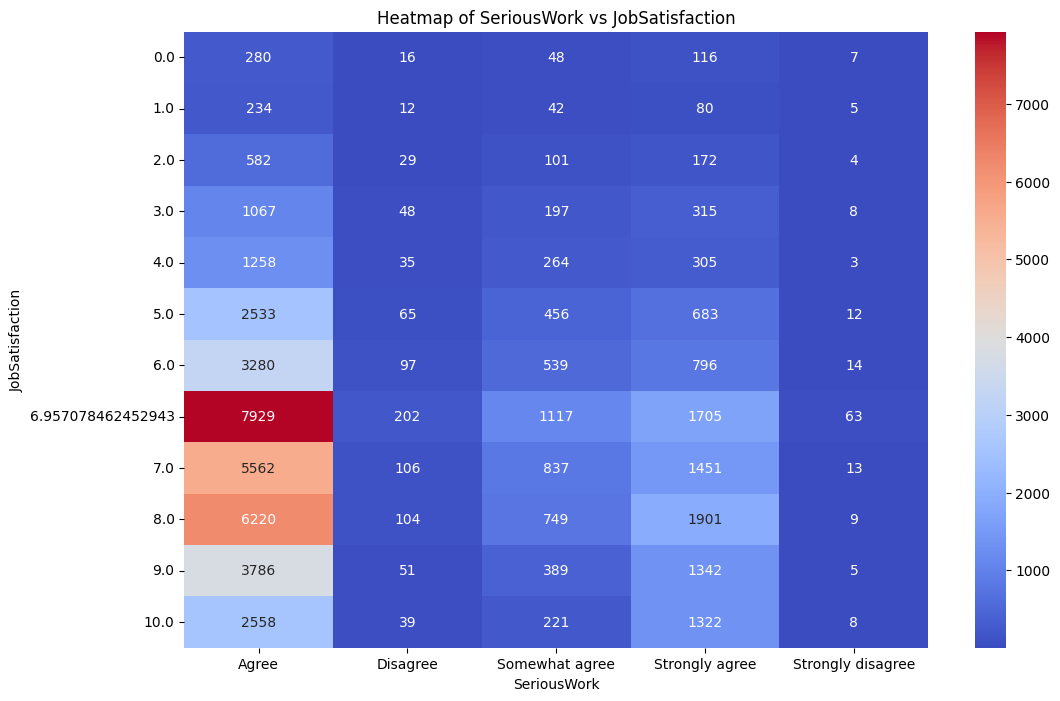

In [165]:
catcol = 'SeriousWork'  
top_categories = df[catcol].value_counts().nlargest(10).index
filtered_df = df[df[catcol].isin(top_categories)]

his = pd.crosstab(filtered_df['JobSatisfaction'], filtered_df['SeriousWork'])
plt.figure(figsize=(12, 8))
sns.heatmap(his, annot=True, cmap="coolwarm", fmt='g')
plt.title('Heatmap of SeriousWork vs JobSatisfaction')
plt.show()
